In [19]:
Name:Vidisha More
Roll_no:21102B0015
Github_link:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [6]:
num_features = X.select_dtypes(include=['float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

In [7]:
num_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])

In [8]:
cat_pipeline = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [9]:
preprocessor = ColumnTransformer(transformers=[('num', num_pipeline, num_features),('cat', cat_pipeline, cat_features)])

In [10]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [13]:
y_pred = model_pipeline.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2398752750.885072


In [17]:
r2 = r2_score(y_test, y_pred)
print("R-Squared:", r2)

R-Squared: 0.8169462518407672


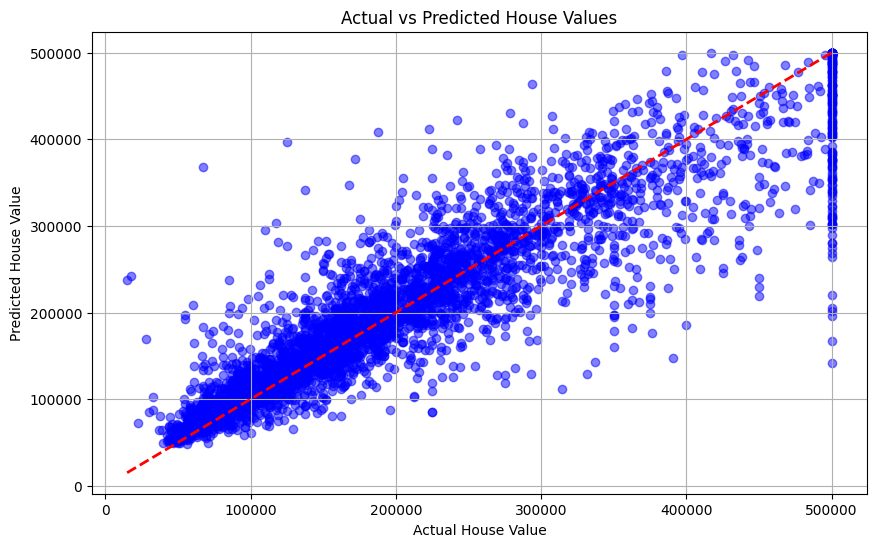

In [18]:
# Plotting Actual vs Predicted values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.title('Actual vs Predicted House Values')
plt.grid(True)
plt.show()
